![image.png](plots/portada4.png)

¡Bienvenidos a la tercera sesión del curso de introducción a Python! Aquí veremos:

* Cómo visualizar nuestros resultados con matplotlib: Alternativas de gráficos para variables continuas, variables discretas, comparativas de dos variables continua...

Al igual que en la primera parte, la documentación asociada a estas sesiones son dos libros, ambos disponibles de forma gratuita [aquí](https://jakevdp.github.io/pages/about.html):

* A Whirlwind Tour of Python by Jake VanderPlas (O’Reilly). Copyright 2016 O’Reilly Media, Inc., 978-1-491-96465-1
* The Python Data Science Handbook by Jake VanderPlas (O’Reilly). Copyright 2016 Jake VanderPlas, 978-1-491-91205-8.


# `matplotlib`
___

![image.png](plots/matplotlib.png)

Veamos una breve introducción al mundo de `matplotlib`. Este es el paquete más conocido de Python para hacer gráficos. Matplotlib se basó mucho en matlab en sus inicios así que si conoces ese lenguaje te será más facil llevarte bien con el. Su principal ventaja es que puedes hacer prácticamente cualquier visualización que se te ocurra usando matplotlib, es muy versatil. El principal inconveniente es que... necesitas mucho código si quieres hacer algo complejo. Pero aquí nos centraremos en lo básico: `matplotlib` 101. Empecemos por decir que para hacer gráficos no se hace `import matplotlib` sino `import matplotlib.pyplot as plt`:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

* El comando `%matplotlib inline` lo que hace es insertar las imagenes dentro del jupyter notebook, sin el, las imagenes se generarían como figuras externas. 
* Y el comando `plt.style.use('seaborn')` nos permite definir un estilo por defecto para las gráficas dentre todos los estilos disponibles. Puedes ver más opciones [aquí](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

Hacer un gráfico sencillo es facil:

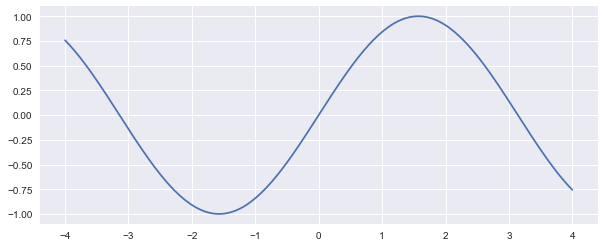

In [2]:
x = np.linspace(-4, 4, 200)

plt.figure(figsize=(10, 4))  # Crear una figura

plt.plot(x, np.sin(x))

`figsize=(10, 4)` es un parámetro opcional que permite controlar el tamaño de la figura.

Hay muchos parámetros que podemos modificar en el gráfico. Para ver una lista completa podéis acceder a la ayuda de la función escribiendo `?plt.plot` o `plt.plot?`. Por ejemplo, cambiemos color y tipo de linea, y añadamos una representación para los puntos:

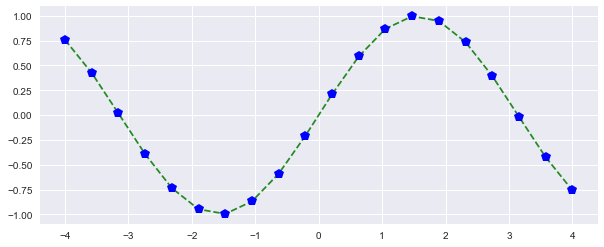

In [3]:
x = np.linspace(-4, 4, 20)

plt.figure(figsize=(10, 4))  # Crear una figura


plt.plot(x, np.sin(x), linestyle='dashed', color='forestgreen', marker ='p', markersize=10, markerfacecolor='blue')

### <font color='D12828'> Ejercicio: </font>

1. Genera un array que tenga 100 puntos entre 1 y 10, y otro que sea la función raiz cuadrada del primer array
2. Representa gráficamente la raiz
3. Añade la curva del logaritmo

In [4]:
# Ejercicio


## Lineplots

Justo en la sección anterior creamos un gráfico de los precios del bitcoin, añadamos un poco más de información a ese gráfico. Incluyamos en el gráfico una media movil de los últimos 20 días:

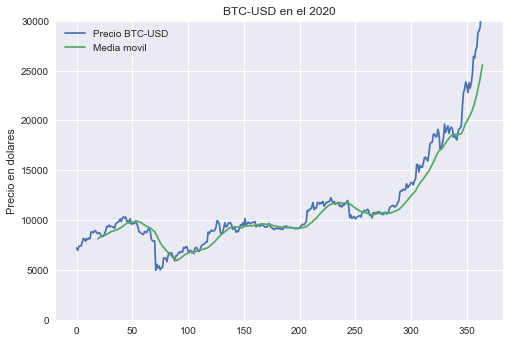

In [5]:
btc_usd = pd.read_csv('data/BTC-USD_2020.csv')['Adj Close']  # Esto carga un objeto de pandas que veremos más adelante

ma = btc_usd.rolling(20).mean()            # Calculamos un moving average
mstd = btc_usd.rolling(20).std()           # Calculamos un moving std (desviación típica de los últimos 20 días)

plt.plot(btc_usd, label='Precio BTC-USD')  # Pintar los datos del precio
plt.plot(ma, label='Media movil')          # Pintar la media movil

plt.ylim([0, 30000])                       # Modificar límites
plt.ylabel('Precio en dolares')            # Añadir etiqueta al eje
plt.title('BTC-USD en el 2020')            # Añadir titulo
plt.legend(loc = 'best')                   #Añadir leyenda

Incluir gráficos en una figura de matplotlib es tan sencillo como ejecutar un nuevo comando de `.plot` por cada gráfico que queramos añadir. Y para modificar otros aspectos, basta usar las funciones:
* `plt.xlim()` `plt.ylim()` para modificar el valor del mínimo y el máximo de los ejes. En la gráfica enterior modificamos el eje `y` para que tenga mínimo valor 0.

* `plt.xlabel()` `plt.ylabel()` para añadir una etiqueta a los ejes. En la gráfica anterior hemos añadido la etiqueta 'Precio en dolares'

* `plt.title` para añadir un título a la gráfica
* `plt.legend` para añadir una leyenda. Un parámetro muy útil de la leyenda es `plt.legend(loc='best')` que pondrá la leyenda en el sitio en el que menos gráfico tape

* etc

Hay muchas funciones muy útiles en matplotlib para gráficos de linea, por ejemplo, una de ellas (especialmente útil con los datos de series temporales del precio del bitcoin que estamos viendo) es `fill_between`. A esta función debe especificarsele un valor para el eje `x` y luego un valor inferior para el eje `y` y otro superior para el eje `y`. Y automáticamente rellenará el area entre las dos lineas del eje `y`. Por ejemplo, en la imagen anterior podemos añadir información de la variabilidad del bitcoin representando unas bandas de confianza basadas en su desviación típica.

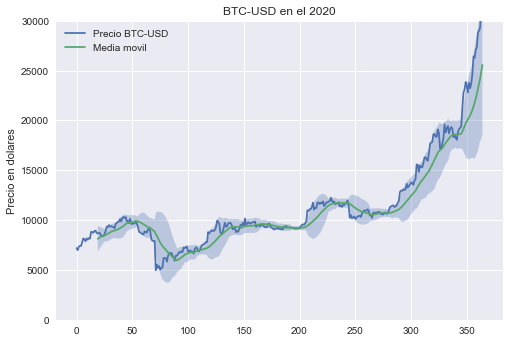

In [6]:
plt.plot(btc_usd, label='Precio BTC-USD')  # Pintar los datos del precio
plt.plot(ma, label='Media movil')          # Pintar la media movil

plt.ylim([0, 30000])                       # Modificar límites
plt.ylabel('Precio en dolares')            # Añadir etiqueta al eje
plt.title('BTC-USD en el 2020')            # Añadir titulo
plt.legend(loc = 'best')                   #Añadir leyenda

plt.fill_between(np.arange(365), ma - 2*mstd, ma + 2*mstd, alpha=0.3)

El parámetro `alpha` controla la transparencia. `alpha=1` es opaco, y `alpha=0` es transparente.

### <font color='D12828'> Ejercicio: </font>

Representa gráficamente el valor de las acciones de Google a lo largo del 2020  (que cargaremos a continuación). Incluye una represesentación de su volatilidad en forma de bandas de confianza basadas en la desviación típica.

In [7]:
google = pd.read_csv('data/GOOGLE_2020.csv')['Adj Close']

In [8]:
# Ejercicio


## Histogramas

Los histográmas son uno de los gráficos más utilizados para estudiar cómo se distribuye una variable que tenga valores numéricos. Para hacer un histograma se puede llamar directamente desde `plt`. Además, el color, y otros muchos aspectos se pueden cambiar como parámetros del gráfico. Para ver todos los parámetros de un tipo de gráfico en concreto, mira la ayuda: `?plt.hist`. Por ejemplo, podemos cambiar el color de cualquier gráfico con el parámetro `color`, que acepta que escribamos un nombre (como `blue`), que le demos el color en escala RGB (como `(1.0,0.2,0.3)`), en HTMl (como el código que estoy usando yo en el siguiente gráfico, que podemos obtener en webs como [esta](https://htmlcolorcodes.com/es/))...

Otro parámetro de importancia en el histograma son los `bins`, o número de intervalos del histograma. A mayor número de bins, mayor granularidad del histograma:

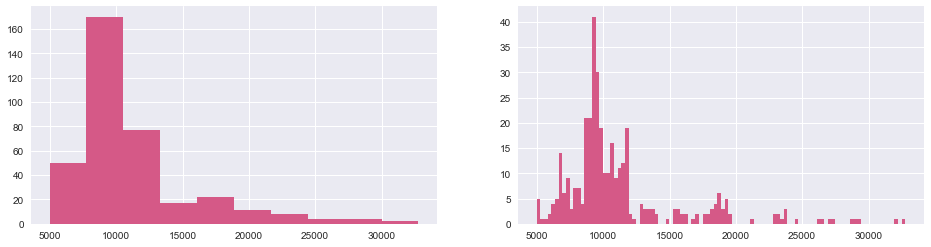

In [9]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
a = plt.hist(btc_usd, color='#D55987', bins=10)

plt.subplot(1,2,2) 
a = plt.hist(btc_usd, color='#D55987', bins=100)

Un parámetro especialmente útil con los histogramas es `alpha` que controla el nivel de transparencia de un gráfico, lo que en los histogramas nos permite superponer los histogramas de varias variables para compararlas:

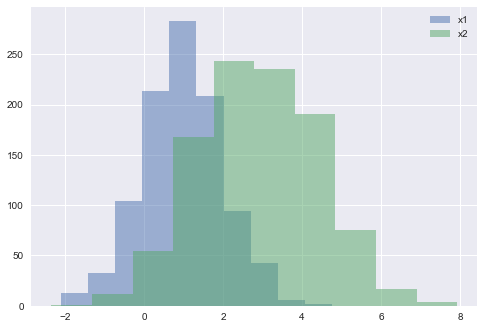

In [10]:
x1 = np.random.normal(1, 1, 1000)    # Generamos 1000 datos de una distr normal
x2 = np.random.normal(3, 1.5, 1000)  # Generamos 1000 datos de una distr normal

plt.hist(x1, alpha=0.5, label='x1')  # Generamos histograma
plt.hist(x2, alpha=0.5, label='x2')  # Generamos histograma
plt.legend(loc='best')               # Incluimos leyenda

### <font color='D12828'> Ejercicio: </font>

El conjunto de datos de `iris` es uno de los más conocidos en estadística. Es un conjunto que incluyen 4 variables numéricas que miden la longitud en cm de distintas partes de las plantas, y una variable categorica (`target`) que especifica el tipo de planta. 

1. Descarga el conjunto de datos de iris usando el comando `from sklearn.datasets import load_iris` (observa cómo descargamos los datos del vino)
2. Representa en una imagen los histogramas de las 4 variables numéricas. Puedes hacerlo en 4 líneas de código, con una linea para cada variable, o en 2 lineas, con un bucle `for` que además ya no depende del número de variables.

In [11]:
# Ejercicio


## Scatterplots

Cuando tenemos dos variables numéricas, puede ser interesante estudiar si existe alguna relación entre ellas. Esto se hace por medio de un scatterplot, o nube de puntos. Para representar scatterplots podemos usar el comando `.scatter`.

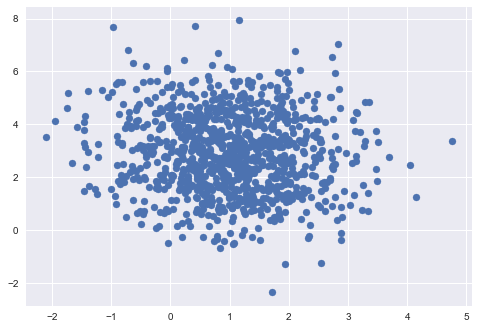

In [12]:
plt.scatter(x1, x2)

Esta función es increíblemente configurable ya que permite controlar el tamaño (con el parámetro `s`) y el color (con el parámetro `c`) de cada punto de forma individual. Eso permite, por ejemplo, hacer que el color de un punto dependa de la categoría a la que pertenezca esa observación en base al criterio de otra variable. Por ejemplo, dividamos al azar los 1000 puntos que generamos antes en 500 puntos de una categoría y 500 puntos de otra categoría, y pintemos cada punto en función de su categoría.

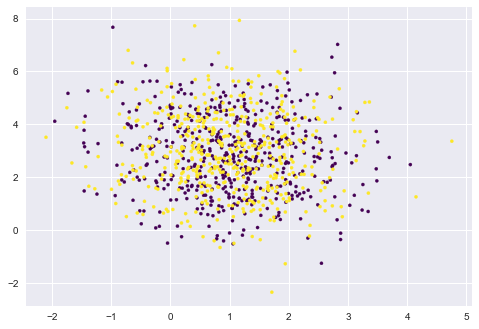

In [13]:
categoria = [0] * 500 + [1] * 500
plt.scatter(x1, x2, s=10, c=categoria, cmap='viridis')

### <font color='D12828'> Ejercicio: </font>

1. Haz un scatterplot de las variables 'sepal length (cm)' y 'petal width (cm)' del conjunto de datos `iris` de tal forma que el color dependa del `target`.

2. Estandariza el conjunto de datos y repite el gráfico. ¿Qué cambia? (fíjate en los ejes)

In [14]:
# Ejercicio


## Boxplots
Otro tipo de gráfico muy interesante para estudiar variables numéricas es el boxplot. Antes representamos gráficamente los histogramas de las 4 variables del conjunto de datos de `iris`. Al ser solo 4 podía verse bien, pero si añadiesemos más histográmas llegaría un punto en que no veríamos nada. Una alternativa a eso es usar boxplots. Para hacer un boxplot, matplotlib incluye la función `plt.boxplot`

In [15]:
# Generar datos de distribución normal que sirvan de ejemplo
data = np.concatenate((np.random.normal(1, 1, (500,1)), np.random.normal(3, 2, (500,1))), axis=1)  
data[0:5, :]  # Observar primeras 5 filas de los datos

array([[ 1.71461222,  3.50191123],
       [ 2.20025289,  2.32199388],
       [ 1.16215459,  0.60973033],
       [-0.53229751, -0.26909249],
       [ 4.43248738,  3.91916453]])

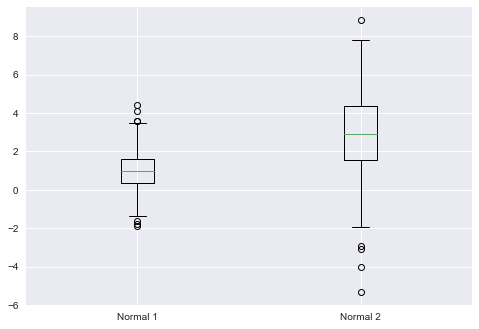

In [16]:
a = plt.boxplot(data, labels=['Normal 1', 'Normal 2'])

Los boxplots en matplotlib son increíblemente configurables. Para verlo en detalle te recomiendo que recurras a la ayuda de la función, pero comomuestra, mejoremos el aspecto del boxplot anterior:

* `patch_artist`: rellena la caja del boxplot
*  `boxprops`: diminutivo de box properties, permite cambiar aspectos de la caja del boxplot (de la misma forma hay `medianprops`, `flierprops` etc)

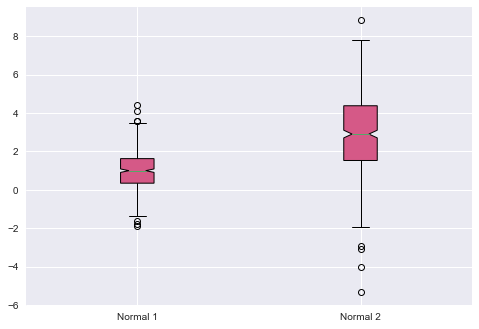

In [17]:
a = plt.boxplot(data, labels=['Normal 1', 'Normal 2'], patch_artist=True, boxprops=dict(facecolor='#D55987'), notch=True)

### <font color='D12828'> Ejercicio: </font>

Haz un boxplot de las 4 variables del conjunto de datos `iris`

In [18]:
# Ejercicio


## Barplots

Los barplots son el gráfico base para representar variables categóricas. Para representar un barplot debemos proporcionarle a Numpy el valor de la cuenta total de elementos que haya en la variable para cada categoría. Por ejemplo:

<BarContainer object of 5 artists>

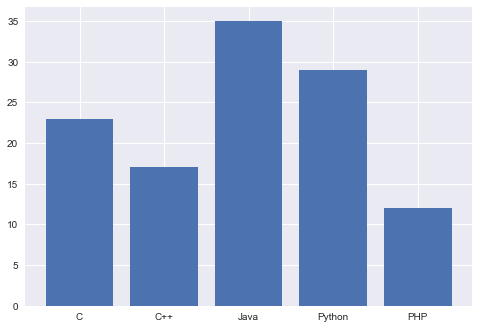

In [19]:
lenguajes = ['C', 'C++', 'Java', 'Python', 'PHP']
estudiantes = np.array([23, 17, 35, 29, 12])

plt.bar(lenguajes, estudiantes)

Lo habitual en un dataset no es tener estos valores de la cuenta, sino tener, para cada observación, la categoría a la que pertenece esa observación. Por ejemplo, en el conjunto de datos de iris, la variable `target` indica a que especie pertenece cada una de las 150 plantas, pero no indica cuantas plantas hay de cada especie. Para obtener esa cuenta en numpy podemos hacer:

<BarContainer object of 4 artists>

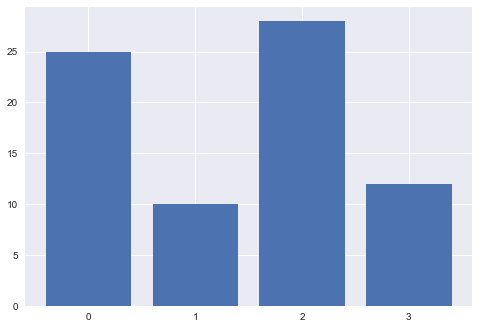

In [20]:
x = np.array(['0'] * 25 + ['1'] * 10 + ['2'] * 28 + ['3'] * 12)

unique, counts = np.unique(x, return_counts=True)

plt.bar(unique, counts)

### <font color='D12828'> Ejercicio: </font>
 Obtén un barplot de la variable `target` del conjunto de datos de iris

In [21]:
# Ejercicio


# Final
___

¿Aún por aquí? Me alegro. Nos queda una sesión más para completar este curso. En la última sesión veremos cómo trabajar con el paquete pandas, el paquete estrella para gestionar dataframes en Python, y sentaremos las bases para hacer analisis exploratorios de datos.

![image.png](plots/goodbye_1.png)